In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [21]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [37]:
data.isnull().values.any()

False

In [75]:
unique = pd.read_csv('unique_m.csv')
material_list = unique.pop('material')

In [76]:
unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [77]:
unique.isnull().values.any()

False

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


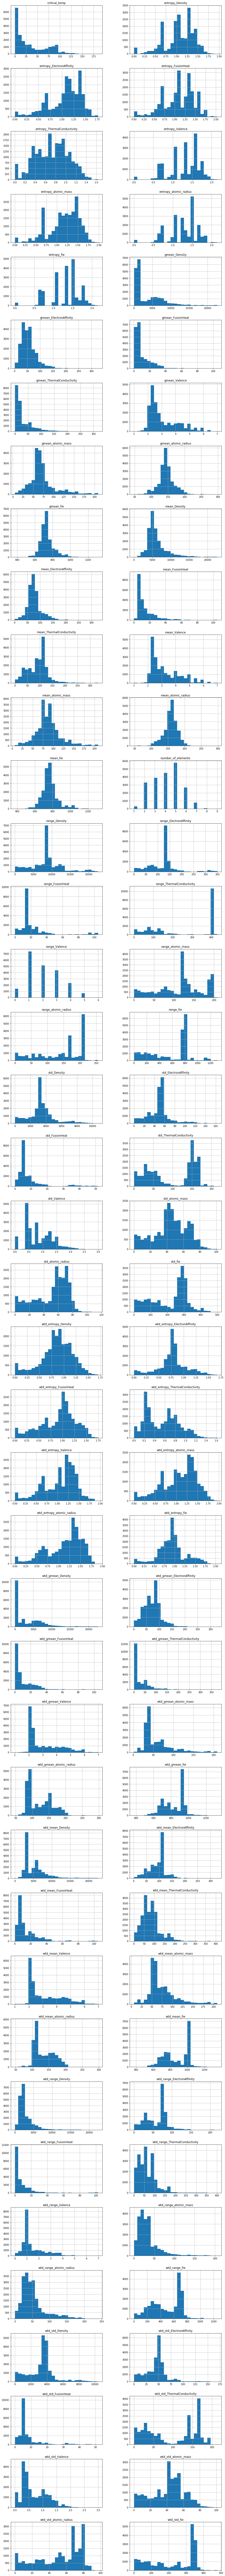

In [78]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
data.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


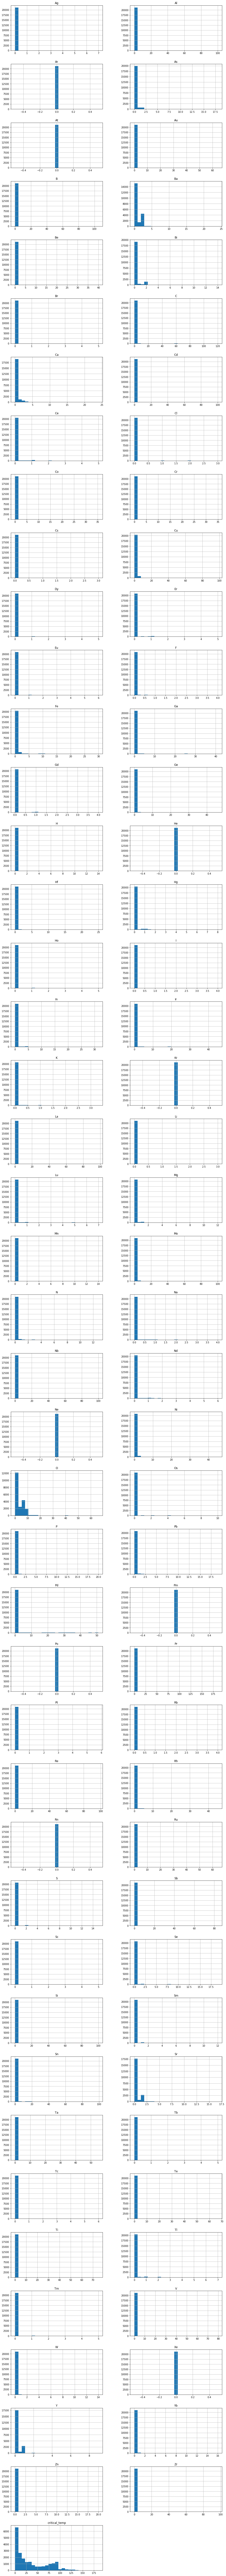

In [79]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
unique.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

In [80]:
combined_data = pd.merge(data, unique, how='right')

In [ ]:
train, test = train_test_split(combined_data, test_size = 0.3)

In [ ]:
y_train = train.pop('critical_temp')
y_test = test.pop('critical_temp')
X_train = train.values
X_test = test.values

In [ ]:
model = RandomForestRegressor(n_estimators=500)

In [ ]:
model.fit(X_train, y_train.ravel())